# Dados e Aprendizagem Automática
### Part IV

## **Linear Regression using USA Housing Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

*Load the CSV - Ecommerce Customers*

In [6]:
EcommerceCustomers = pd.read_csv('DAA_datasets/EcommerceCustomers.csv')

**Exploratory Data Analysis (EDA)**

In [7]:
EcommerceCustomers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [8]:
EcommerceCustomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [13]:
EcommerceCustomers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [16]:
EcommerceCustomers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


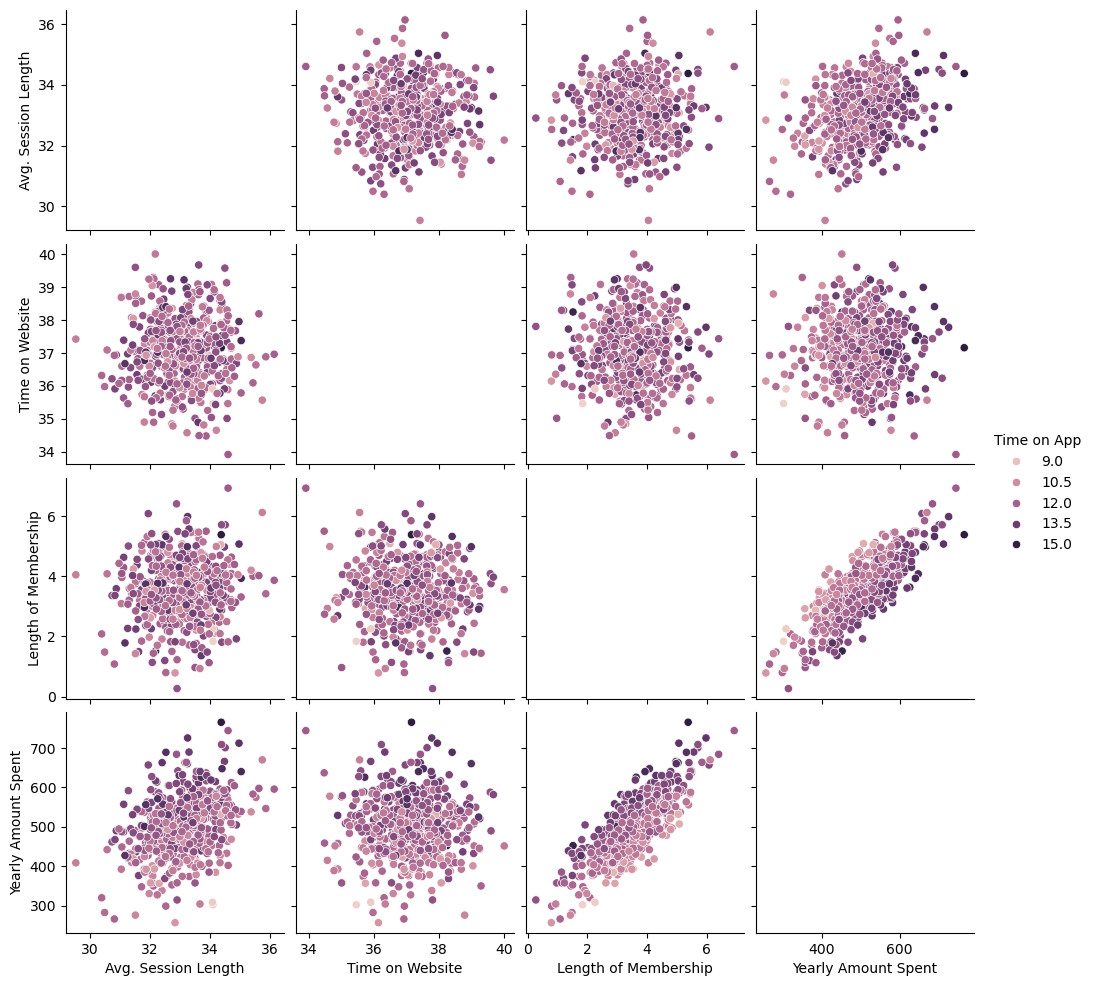

In [17]:
sns.pairplot(EcommerceCustomers, hue='Time on App')
plt.show()

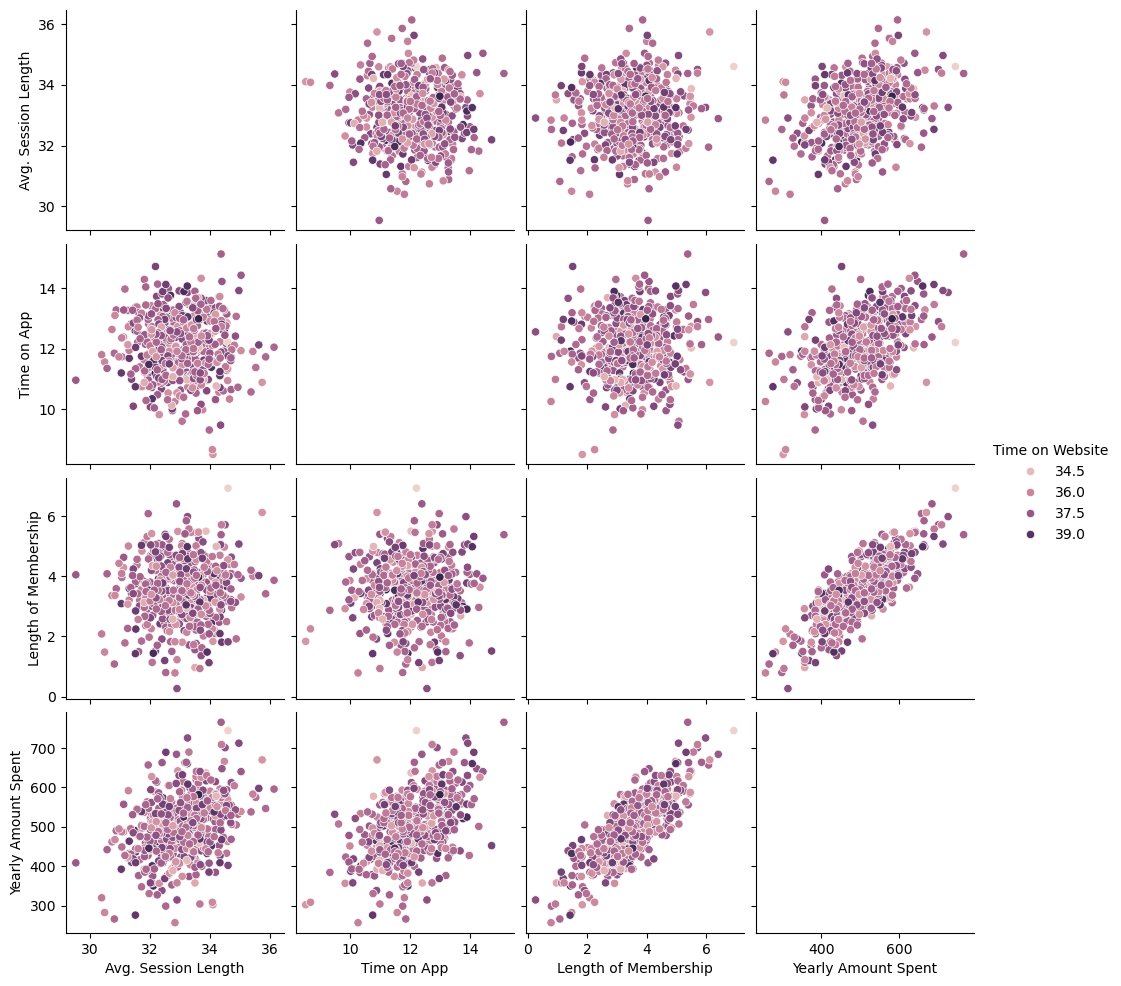

In [18]:
sns.pairplot(EcommerceCustomers, hue='Time on Website')
plt.show()

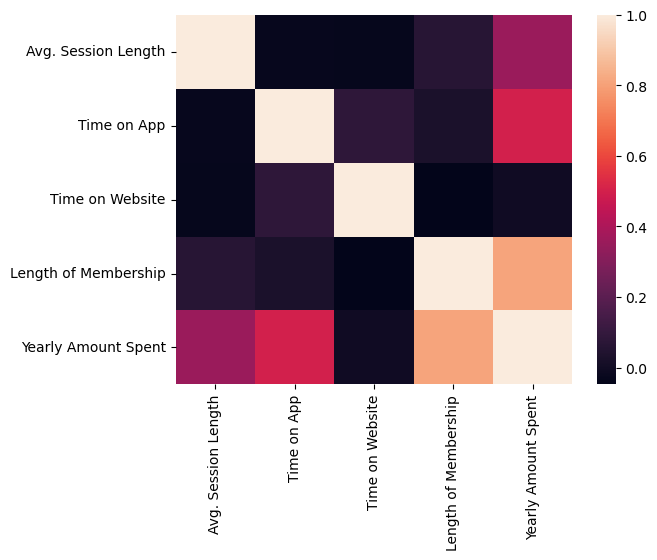

In [21]:
sns.heatmap(EcommerceCustomers.corr(numeric_only=True))
plt.show()

**Linear Regression Model**

In [35]:
X = USAhousing[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = USAhousing['Yearly Amount Spent']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

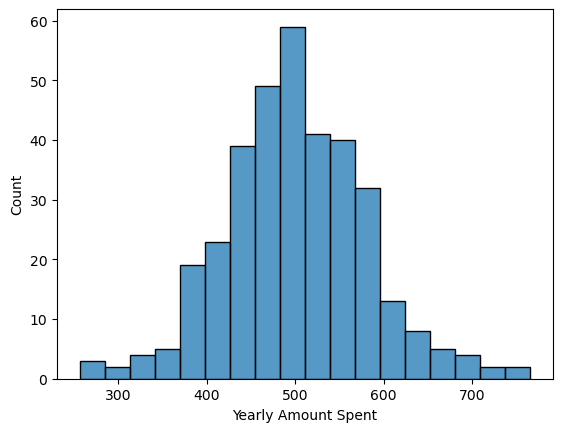

In [38]:
sns.histplot(y_train)
plt.show()

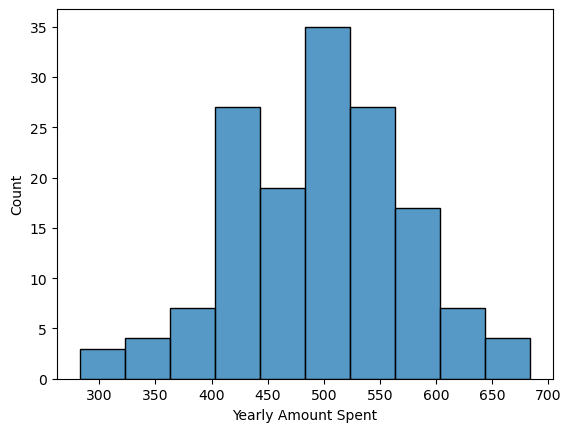

In [39]:
sns.histplot(y_test)
plt.show()

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

*Model Evaluation*

In [42]:
print(lm.intercept_)

-1072.545204406863


In [44]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Session Length,25.863813
Time on App,39.026650
Time on Website,0.790016
Length of Membership,61.419589


*Interpreting the coefficients*

Holding all other features fixed:
- **Avg. Session Length (25.86)**: Para cada aumento de uma unidade na duração média da sessão, o gasto anual aumenta em aproximadamente 25.86 unidades.

- **Time on App (39.03)**: Para cada aumento de uma unidade no tempo gasto no aplicativo, o gasto anual aumenta em aproximadamente 39.03 unidades.

- **Time on Website (0.79)**: Para cada aumento de uma unidade no tempo gasto no website, o gasto anual aumenta apenas em aproximadamente 0.79 unidades.

- **Length of Membership (61.42)**: Para cada aumento de uma unidade no tempo de adesão, o gasto anual aumenta em aproximadamente 61.42 unidades.

### Conclusão:
Os resultados indicam que o tempo no aplicativo e o tempo de adesão têm os maiores impactos no gasto anual dos clientes, sugerindo que investir no desenvolvimento da aplicação pode gerar maior retorno.

*Predictions*

In [45]:
predictions = lm.predict(X_test)

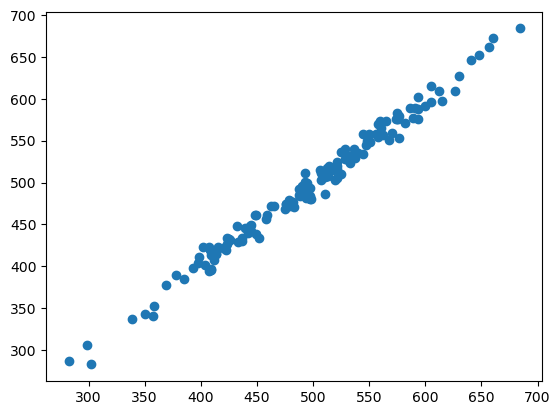

In [46]:
plt.scatter(y_test,predictions)
plt.show()

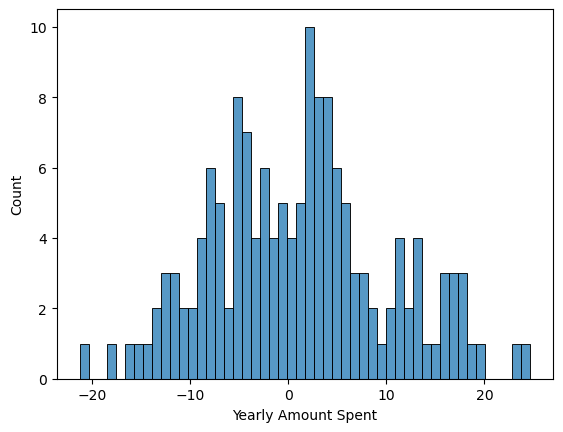

In [47]:
sns.histplot((y_test-predictions),bins=50);
plt.show()

**Regression Evaluation Metrics**


The three common evaluation metrics for regression problems are:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand because it's the *average error*;
- **MSE** is more popular than MAE because MSE *"punishes" larger errors*, which tends to be useful in the real world;
- **RMSE** is even more popular than MSE because RMSE is interpretable in *units of the target variable*.

All of these are **loss functions** because we want to *minimize the error*.

In [48]:
from sklearn import metrics

In [53]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.286460450659823
MSE: 82.68839139529085
RMSE: 9.09331575363414


### Interpretação das Métricas de Erro:

- **MAE (Erro Médio Absoluto)**: 
  - **Valor**: 7.29
  - O MAE nos mostra que, em média, o modelo de regressão erra em cerca de 7.29 unidades ao prever o gasto anual dos clientes. Quanto menor o MAE, melhor o desempenho do modelo.

- **MSE (Erro Quadrático Médio)**: 
  - **Valor**: 82.69
  - O MSE penaliza grandes erros, já que ele eleva os erros ao quadrado. Um valor de MSE de 82.69 sugere que existem alguns desvios significativos nas previsões do modelo.

- **RMSE (Raiz do Erro Quadrático Médio)**: 
  - **Valor**: 9.09
  - O RMSE é a raiz quadrada do MSE logo, está na mesma unidade da variável alvo, neste caso, o gasto anual. O RMSE de 9.09 significa que o erro médio das previsões é de aproximadamente 9.09 unidades.

### Resumo:
Essas métricas indicam o desempenho geral do modelo. Tanto o MAE quanto o RMSE estão entre 7 e 9 unidades, o que significa que o modelo está, em média, a errar entre 7 e 9 unidades ao prever o gasto anual dos clientes.